In [1410]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve,
    auc,
    classification_report,
)
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split,
)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [1411]:
def plotROC(clf, XTest, QTest, probs=True):
    if (probs == True):
        probs = clf.predict_proba(XTest)
        preds = probs[:,1]
    else:
        preds = clf.decision_function(XTest)
    
    fpr, tpr, threshold = roc_curve(QTest, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [1412]:
data_w = pd.read_csv("data/winequality-white.csv", header=0, sep=';')
data_r = pd.read_csv("data/winequality-red.csv", header=0, sep=';')

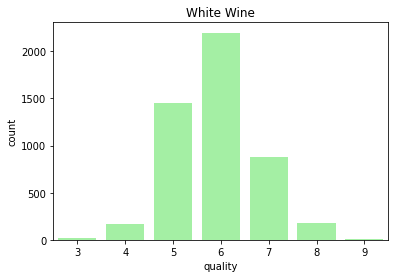

In [1413]:
g = sns.countplot(data=data_w, x="quality", color='palegreen').set(title = "White Wine")

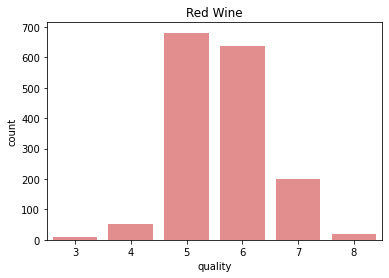

In [1414]:
g = sns.countplot(data=data_r, x="quality", color='lightcoral').set(title = "Red Wine")

In [1415]:
data_w["alcohol_cat"] = 'L'
mean = data_w["alcohol"].mean()
stddev = data_w["alcohol"].std()
for index, series in data_w.iterrows():
    alcohol = series["alcohol"]
    if alcohol < (mean-stddev):
        data_w.loc[index, "alcohol_cat"] = 'L'
    elif alcohol > (mean+stddev):
        data_w.loc[index, "alcohol_cat"] = 'H'
    else:
        data_w.loc[index, "alcohol_cat"] = 'M'

In [1416]:
data_r["alcohol_cat"] = 'L'
mean = data_r["alcohol"].mean()
stddev = data_r["alcohol"].std()
for index, series in data_r.iterrows():
    alcohol = series["alcohol"]
    if alcohol < (mean-stddev):
        data_r.loc[index, "alcohol_cat"] = 'L'
    elif alcohol > (mean+stddev):
        data_r.loc[index, "alcohol_cat"] = 'H'
    else:
        data_r.loc[index, "alcohol_cat"] = 'M'

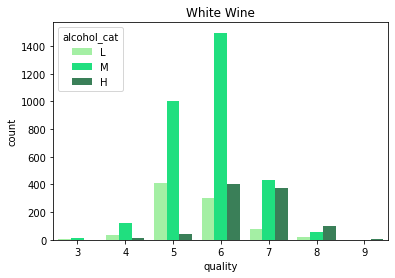

In [1417]:
g = sns.countplot(data=data_w, x="quality", hue='alcohol_cat', hue_order=['L','M','H'], palette={'L':"palegreen",'M':"springgreen",'H':"seagreen"}).set(title = "White Wine")

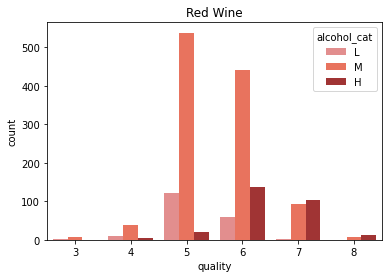

In [1418]:
g = sns.countplot(data=data_r, x="quality", hue='alcohol_cat', hue_order=['L','M','H'], palette={'L':"lightcoral",'M':"tomato",'H':"firebrick"}).set(title = "Red Wine")

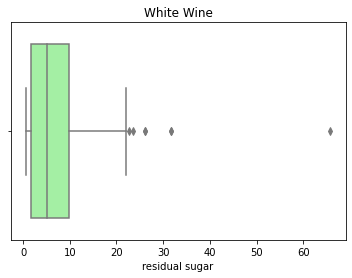

In [1419]:
g = sns.boxplot(data=data_w, x='residual sugar', color='palegreen').set(title = "White Wine")

In [1420]:
data_w["isSweet"] = 0
threshold = data_w["residual sugar"].median()

for index, series in data_w.iterrows():
    sugar = series["residual sugar"]
    if sugar < threshold:
        data_w.loc[index, "isSweet"] = 0
    else:
        data_w.loc[index, "isSweet"] = 1

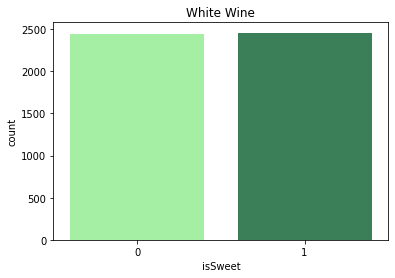

In [1421]:
g = sns.countplot(data=data_w, x="isSweet", palette={0:"palegreen",1:"seagreen"}).set(title = "White Wine")

In [1422]:
data_w["isSweet"].value_counts()

1    2458
0    2440
Name: isSweet, dtype: int64

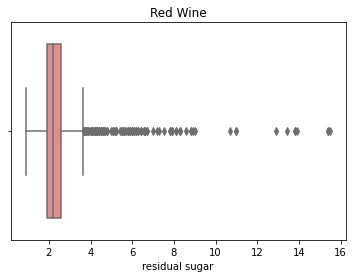

In [1423]:
g = sns.boxplot(data=data_r, x='residual sugar', color='lightcoral').set(title = "Red Wine")

In [1424]:
data_r["isSweet"] = 0
threshold = data_r["residual sugar"].median()

for index, series in data_r.iterrows():
    sugar = series["residual sugar"]
    if sugar < threshold:
        data_r.loc[index, "isSweet"] = 0
    else:
        data_r.loc[index, "isSweet"] = 1

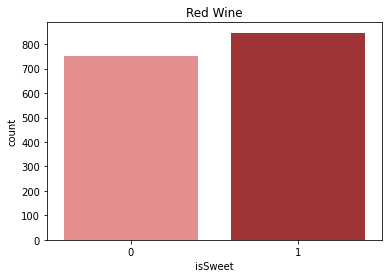

In [1425]:
g = sns.countplot(data=data_r, x="isSweet", palette={0:"lightcoral",1:"firebrick"}).set(title = "Red Wine")

In [1426]:
data_r["isSweet"].value_counts()

1    847
0    752
Name: isSweet, dtype: int64

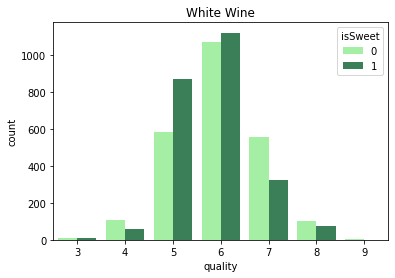

In [1427]:
g = sns.countplot(data=data_w, x="quality", hue='isSweet', hue_order=[0,1], palette={0:"palegreen",1:"seagreen"}).set(title = "White Wine")

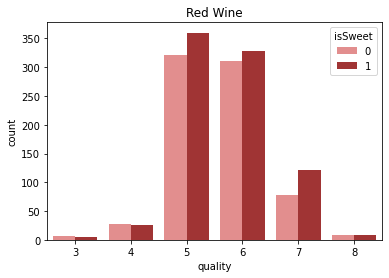

In [1428]:
g = sns.countplot(data=data_r, x="quality", hue='isSweet', hue_order=[0,1], palette={0:"lightcoral",1:"firebrick"}).set(title = "Red Wine")

## Scatter Plots with Regression Lines

### [Fixed Acidity]

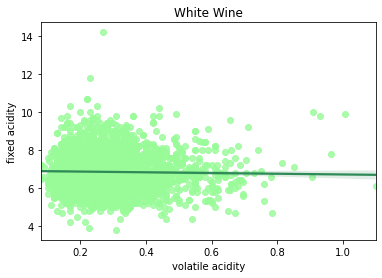

In [1429]:
g = sns.regplot(data=data_w, x="volatile acidity", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

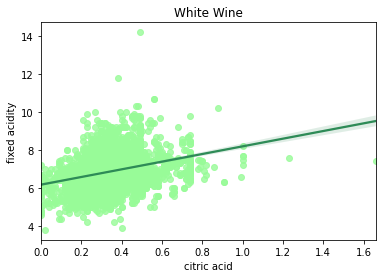

In [1430]:
g = sns.regplot(data=data_w, x="citric acid", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

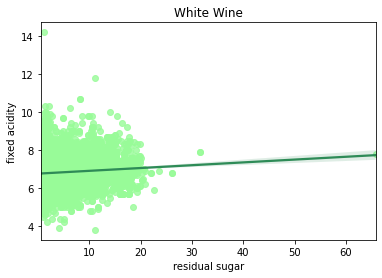

In [1431]:
g = sns.regplot(data=data_w, x="residual sugar", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

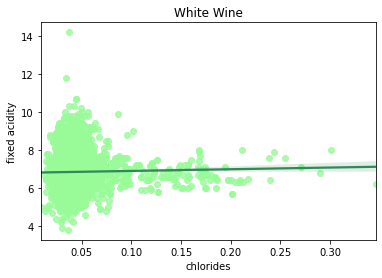

In [1432]:
g = sns.regplot(data=data_w, x="chlorides", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

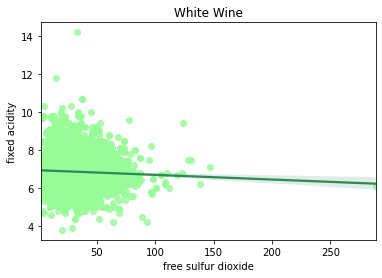

In [1433]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

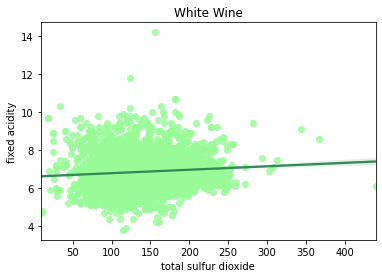

In [1434]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

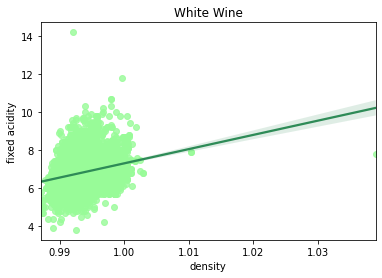

In [1435]:
g = sns.regplot(data=data_w, x="density", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

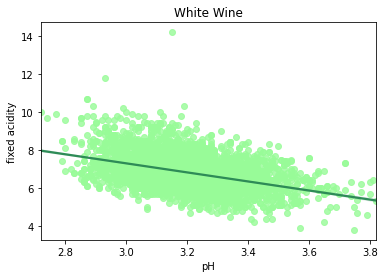

In [1436]:
g = sns.regplot(data=data_w, x="pH", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

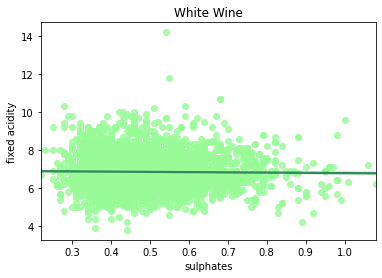

In [1437]:
g = sns.regplot(data=data_w, x="sulphates", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

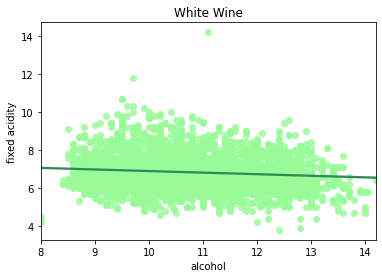

In [1438]:
g = sns.regplot(data=data_w, x="alcohol", y="fixed acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

### [Volatile Acidity]

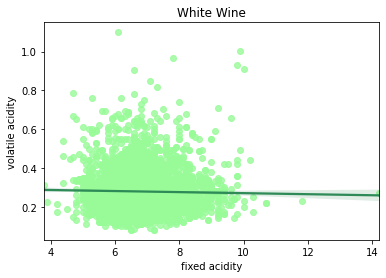

In [1439]:
g = sns.regplot(data=data_w, x="fixed acidity", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

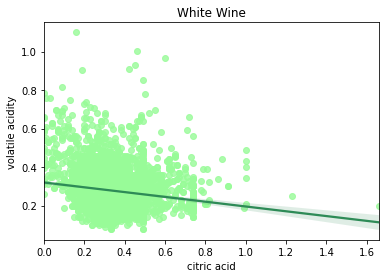

In [1440]:
g = sns.regplot(data=data_w, x="citric acid", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

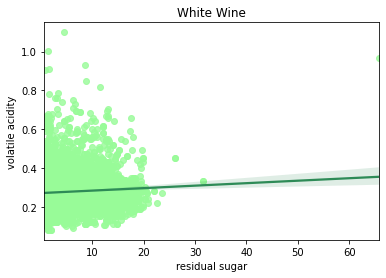

In [1441]:
g = sns.regplot(data=data_w, x="residual sugar", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

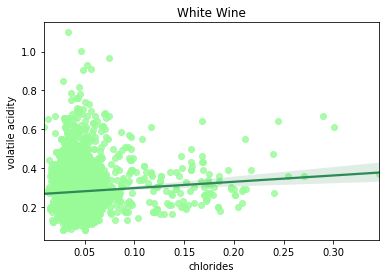

In [1442]:
g = sns.regplot(data=data_w, x="chlorides", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

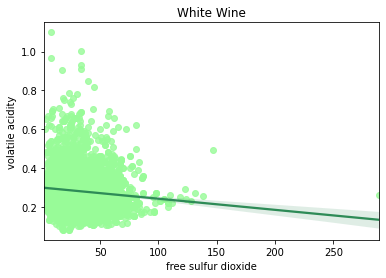

In [1443]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

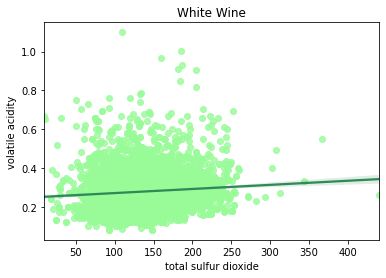

In [1444]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

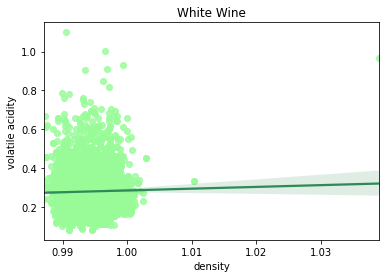

In [1445]:
g = sns.regplot(data=data_w, x="density", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

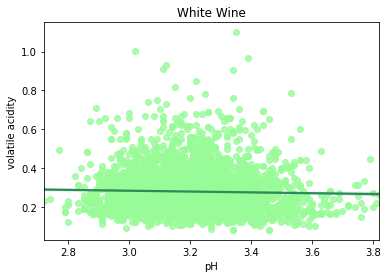

In [1446]:
g = sns.regplot(data=data_w, x="pH", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

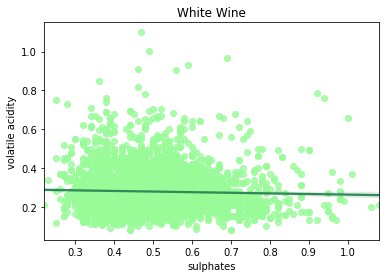

In [1447]:
g = sns.regplot(data=data_w, x="sulphates", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

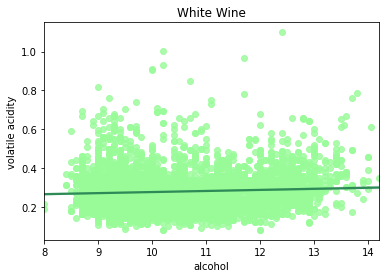

In [1448]:
g = sns.regplot(data=data_w, x="alcohol", y="volatile acidity", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

### [Citric Acid]

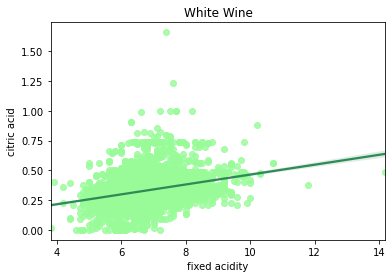

In [1449]:
g = sns.regplot(data=data_w, x="fixed acidity", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

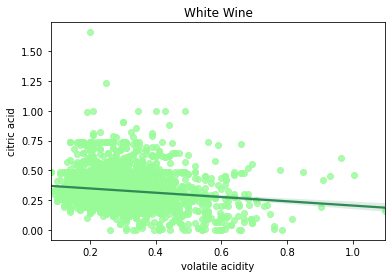

In [1450]:
g = sns.regplot(data=data_w, x="volatile acidity", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

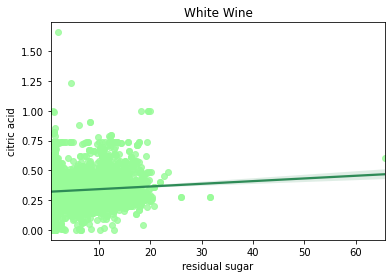

In [1451]:
g = sns.regplot(data=data_w, x="residual sugar", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

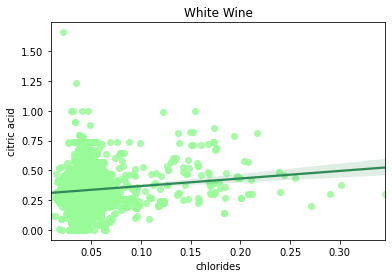

In [1452]:
g = sns.regplot(data=data_w, x="chlorides", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

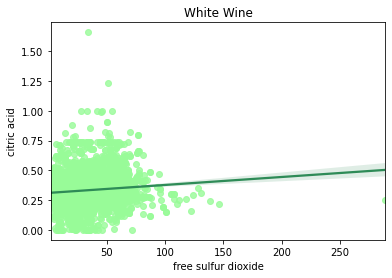

In [1453]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

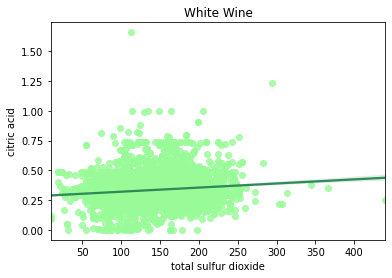

In [1454]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

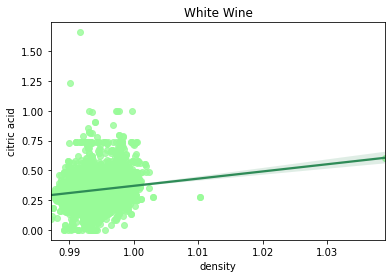

In [1455]:
g = sns.regplot(data=data_w, x="density", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

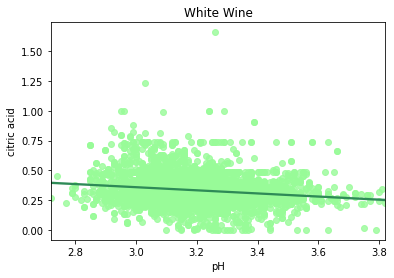

In [1456]:
g = sns.regplot(data=data_w, x="pH", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

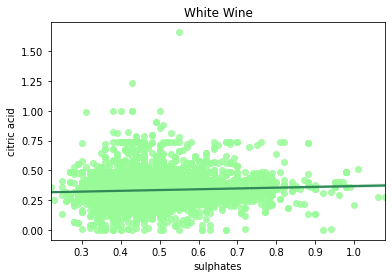

In [1457]:
g = sns.regplot(data=data_w, x="sulphates", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

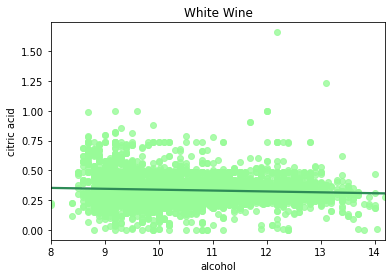

In [1458]:
g = sns.regplot(data=data_w, x="alcohol", y="citric acid", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

### [Residual Sugar]

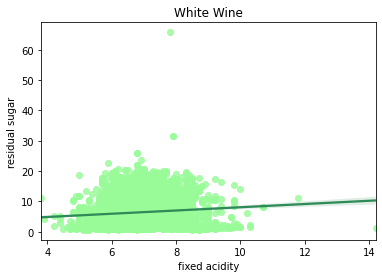

In [1459]:
g = sns.regplot(data=data_w, x="fixed acidity", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

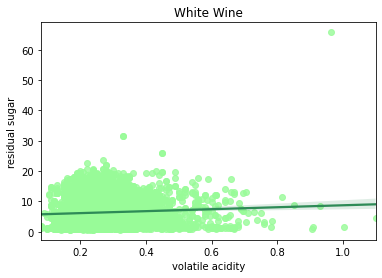

In [1460]:
g = sns.regplot(data=data_w, x="volatile acidity", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

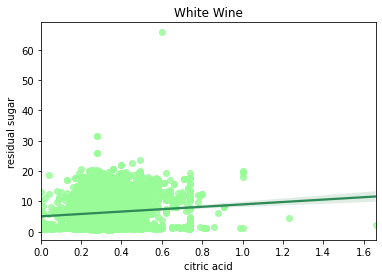

In [1461]:
g = sns.regplot(data=data_w, x="citric acid", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

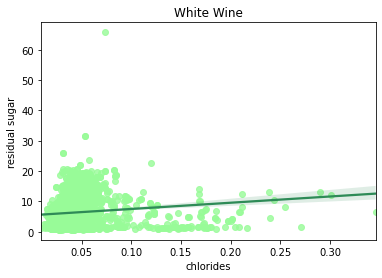

In [1462]:
g = sns.regplot(data=data_w, x="chlorides", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

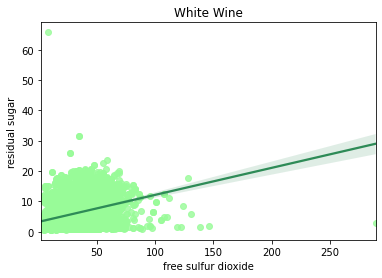

In [1463]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

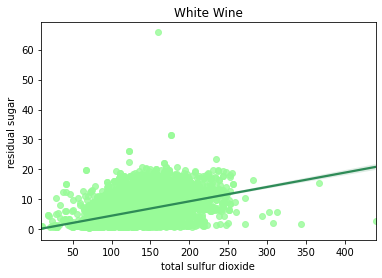

In [1464]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

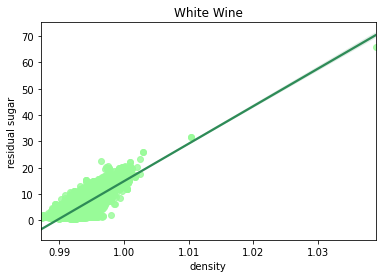

In [1465]:
g = sns.regplot(data=data_w, x="density", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

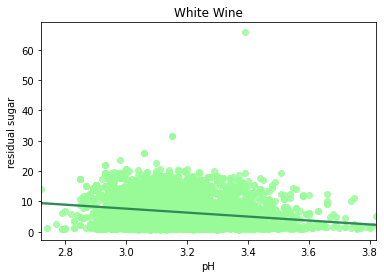

In [1466]:
g = sns.regplot(data=data_w, x="pH", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

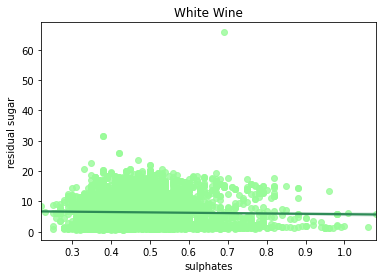

In [1467]:
g = sns.regplot(data=data_w, x="sulphates", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

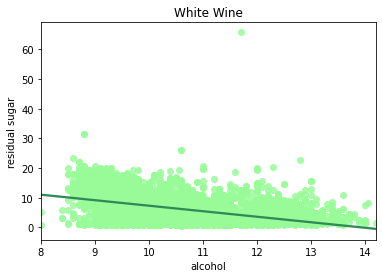

In [1468]:
g = sns.regplot(data=data_w, x="alcohol", y="residual sugar", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

### [Chlorides]

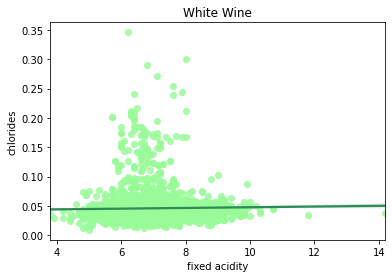

In [1469]:
g = sns.regplot(data=data_w, x="fixed acidity", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

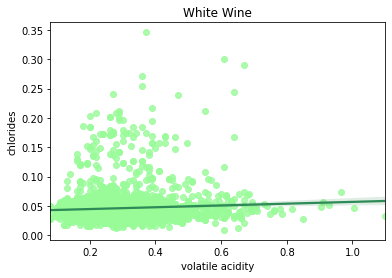

In [1470]:
g = sns.regplot(data=data_w, x="volatile acidity", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

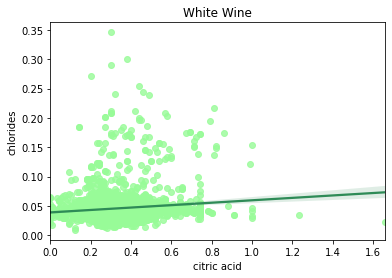

In [1471]:
g = sns.regplot(data=data_w, x="citric acid", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

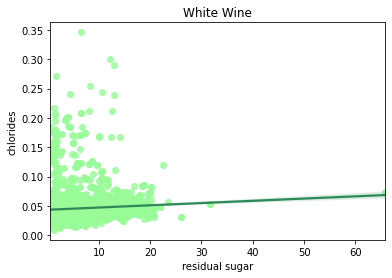

In [1472]:
g = sns.regplot(data=data_w, x="residual sugar", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

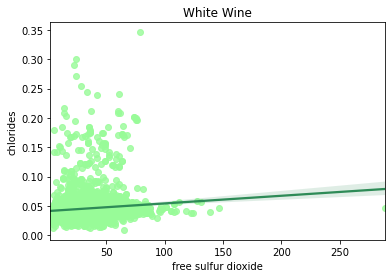

In [1473]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

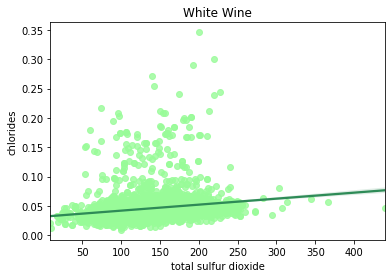

In [1474]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

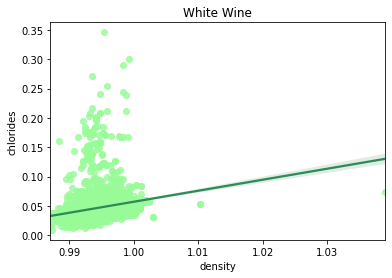

In [1475]:
g = sns.regplot(data=data_w, x="density", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

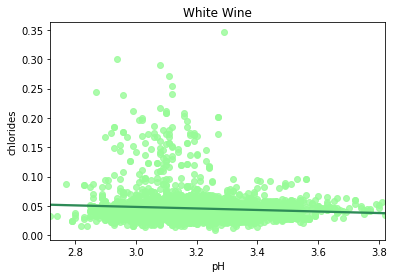

In [1476]:
g = sns.regplot(data=data_w, x="pH", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

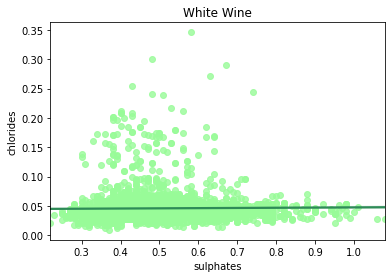

In [1477]:
g = sns.regplot(data=data_w, x="sulphates", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

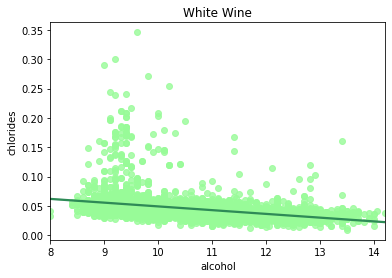

In [1478]:
g = sns.regplot(data=data_w, x="alcohol", y="chlorides", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

### [Free Sulfur Dioxide]

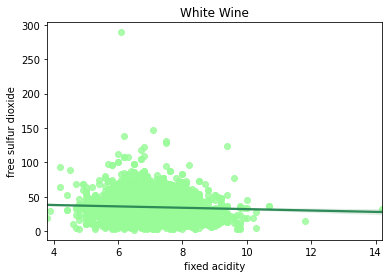

In [1479]:
g = sns.regplot(data=data_w, x="fixed acidity", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

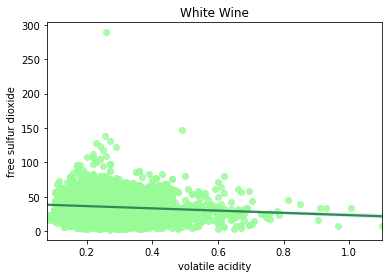

In [1480]:
g = sns.regplot(data=data_w, x="volatile acidity", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

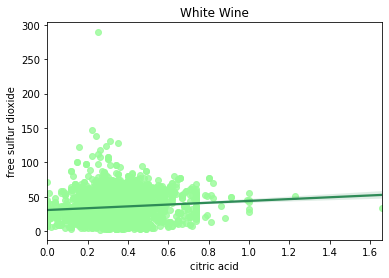

In [1481]:
g = sns.regplot(data=data_w, x="citric acid", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

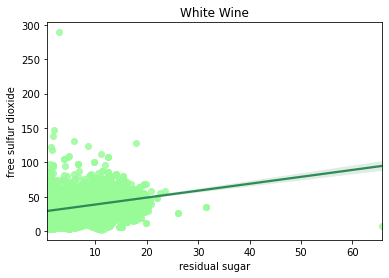

In [1482]:
g = sns.regplot(data=data_w, x="residual sugar", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

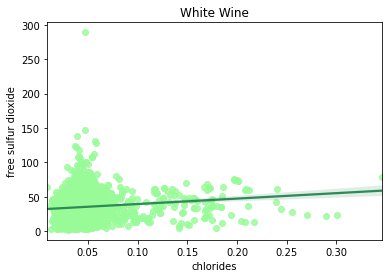

In [1483]:
g = sns.regplot(data=data_w, x="chlorides", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

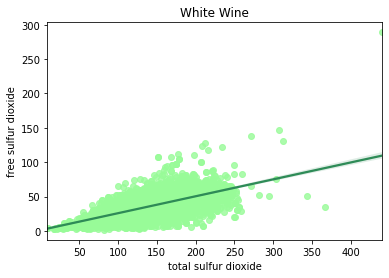

In [1484]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

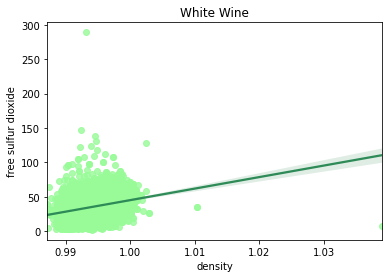

In [1485]:
g = sns.regplot(data=data_w, x="density", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

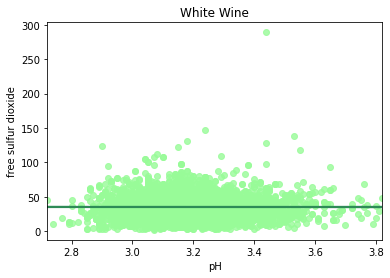

In [1486]:
g = sns.regplot(data=data_w, x="pH", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

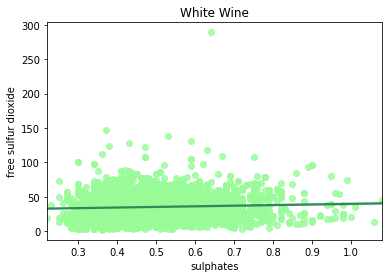

In [1487]:
g = sns.regplot(data=data_w, x="sulphates", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

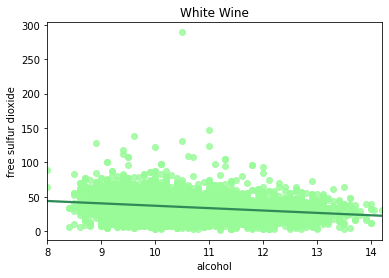

In [1488]:
g = sns.regplot(data=data_w, x="alcohol", y="free sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

### [Total Sulfur Dioxide]

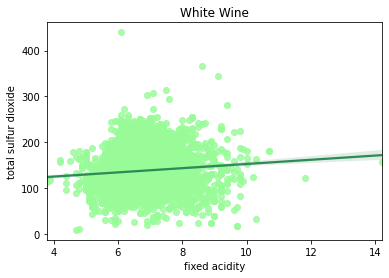

In [1489]:
g = sns.regplot(data=data_w, x="fixed acidity", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

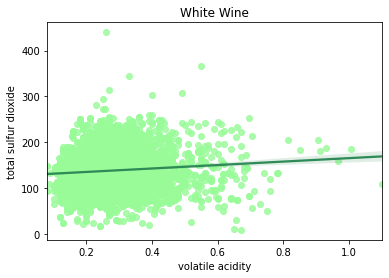

In [1490]:
g = sns.regplot(data=data_w, x="volatile acidity", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

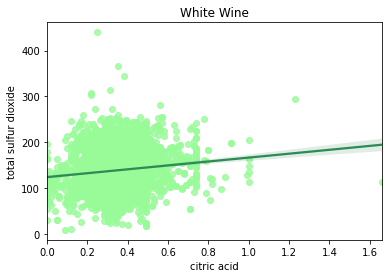

In [1491]:
g = sns.regplot(data=data_w, x="citric acid", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

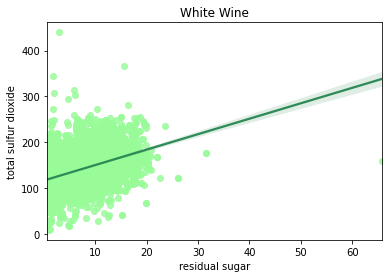

In [1492]:
g = sns.regplot(data=data_w, x="residual sugar", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

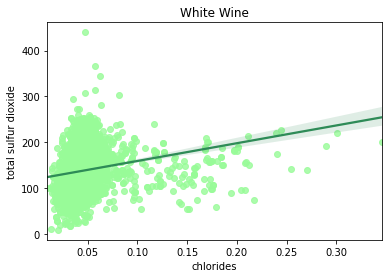

In [1493]:
g = sns.regplot(data=data_w, x="chlorides", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

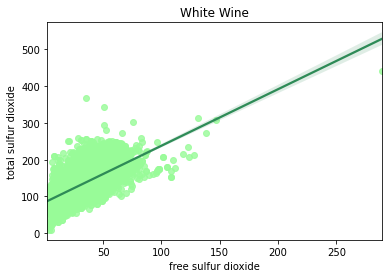

In [1494]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

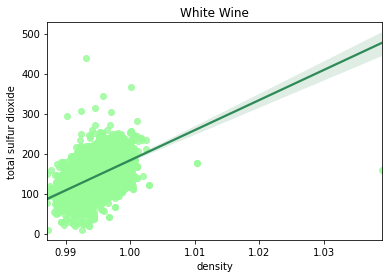

In [1495]:
g = sns.regplot(data=data_w, x="density", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

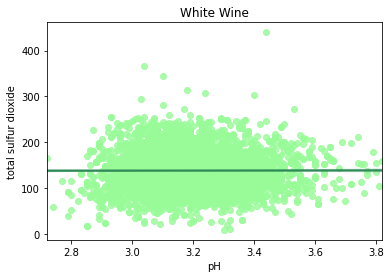

In [1496]:
g = sns.regplot(data=data_w, x="pH", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

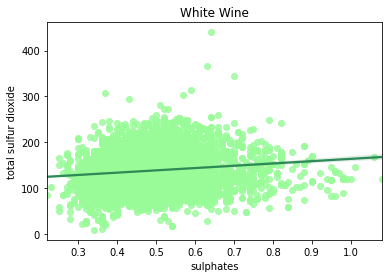

In [1497]:
g = sns.regplot(data=data_w, x="sulphates", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

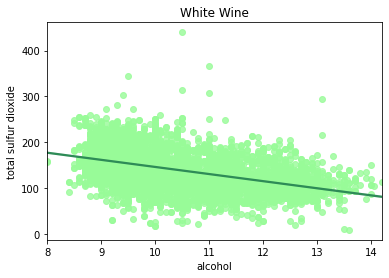

In [1498]:
g = sns.regplot(data=data_w, x="alcohol", y="total sulfur dioxide", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

### [Density]

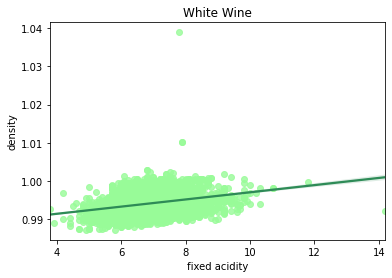

In [1499]:
g = sns.regplot(data=data_w, x="fixed acidity", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

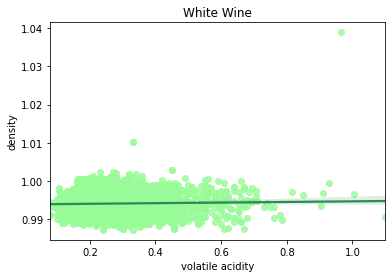

In [1500]:
g = sns.regplot(data=data_w, x="volatile acidity", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

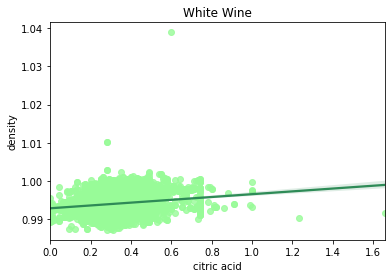

In [1501]:
g = sns.regplot(data=data_w, x="citric acid", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

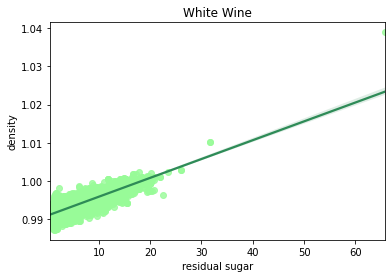

In [1502]:
g = sns.regplot(data=data_w, x="residual sugar", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

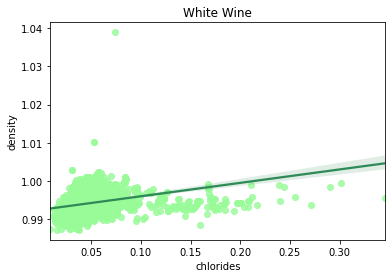

In [1503]:
g = sns.regplot(data=data_w, x="chlorides", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

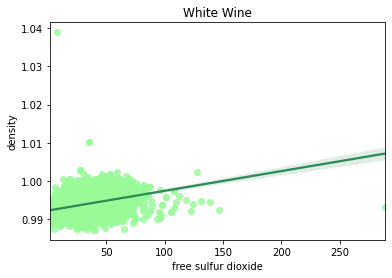

In [1504]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

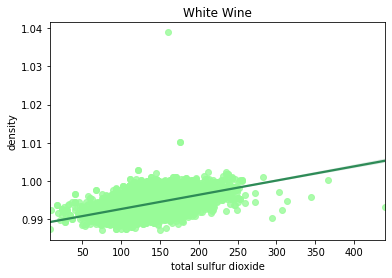

In [1505]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

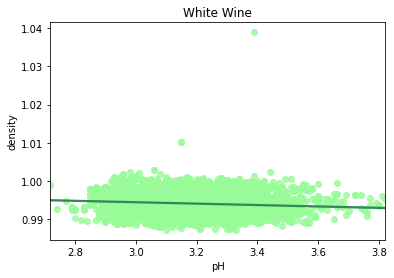

In [1506]:
g = sns.regplot(data=data_w, x="pH", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

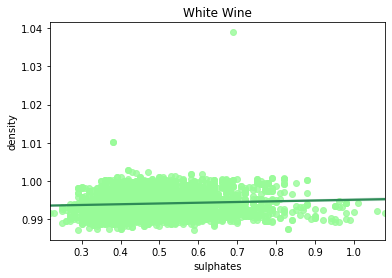

In [1507]:
g = sns.regplot(data=data_w, x="sulphates", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

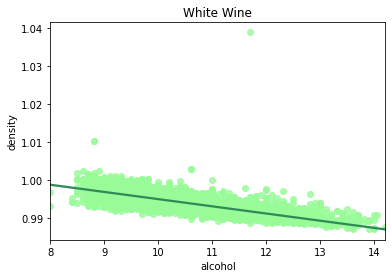

In [1508]:
g = sns.regplot(data=data_w, x="alcohol", y="density", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

### [pH]

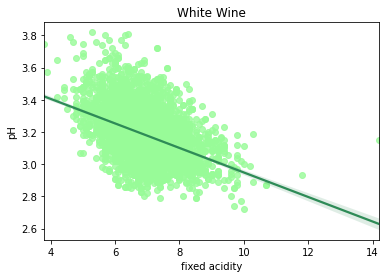

In [1509]:
g = sns.regplot(data=data_w, x="fixed acidity", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

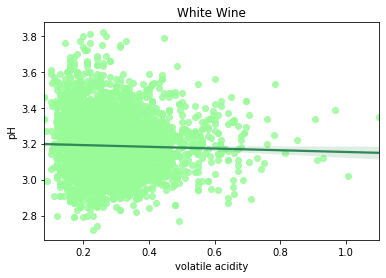

In [1510]:
g = sns.regplot(data=data_w, x="volatile acidity", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

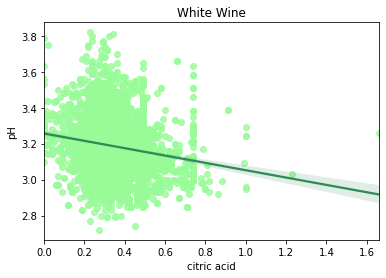

In [1511]:
g = sns.regplot(data=data_w, x="citric acid", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

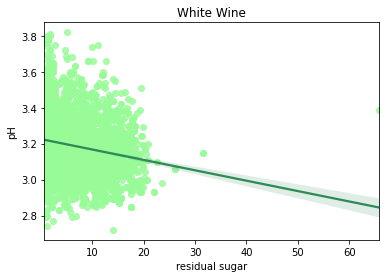

In [1512]:
g = sns.regplot(data=data_w, x="residual sugar", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

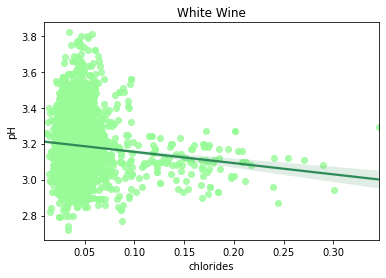

In [1513]:
g = sns.regplot(data=data_w, x="chlorides", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

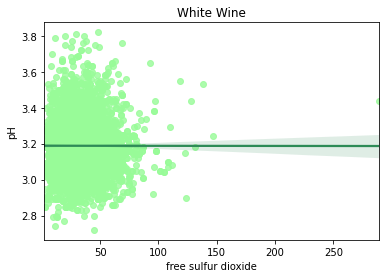

In [1514]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

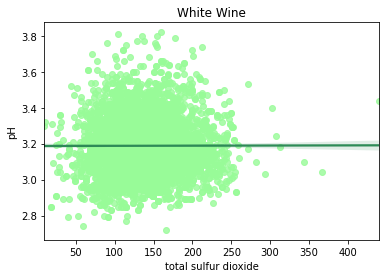

In [1515]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

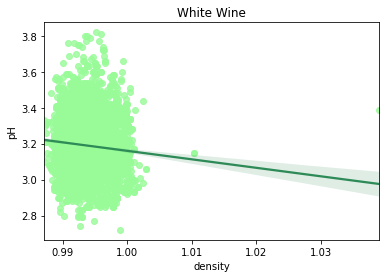

In [1516]:
g = sns.regplot(data=data_w, x="density", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

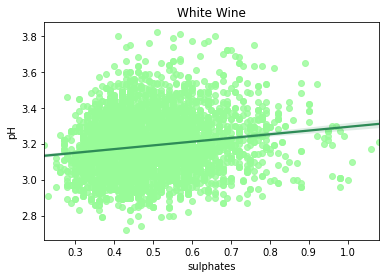

In [1517]:
g = sns.regplot(data=data_w, x="sulphates", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

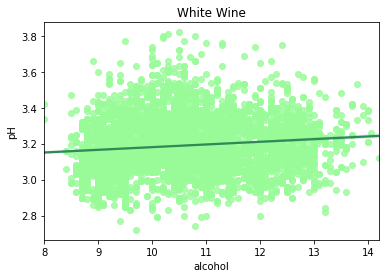

In [1518]:
g = sns.regplot(data=data_w, x="alcohol", y="pH", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

### [Sulphates]

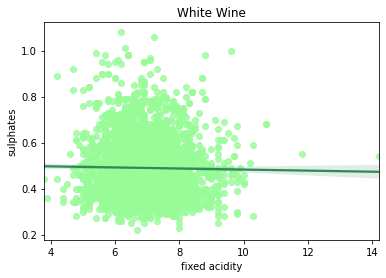

In [1519]:
g = sns.regplot(data=data_w, x="fixed acidity", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

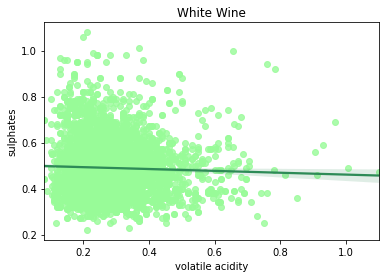

In [1520]:
g = sns.regplot(data=data_w, x="volatile acidity", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

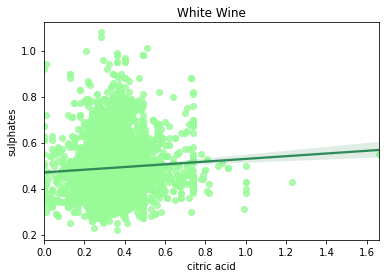

In [1521]:
g = sns.regplot(data=data_w, x="citric acid", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

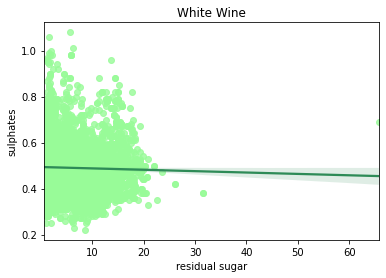

In [1522]:
g = sns.regplot(data=data_w, x="residual sugar", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

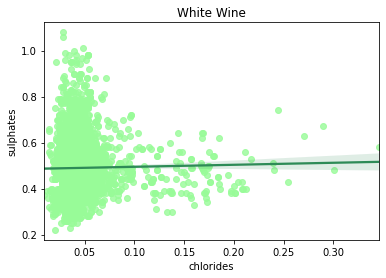

In [1523]:
g = sns.regplot(data=data_w, x="chlorides", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

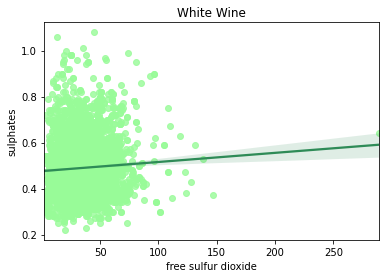

In [1524]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

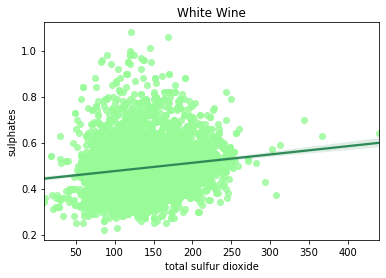

In [1525]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

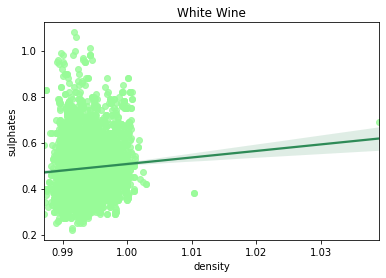

In [1526]:
g = sns.regplot(data=data_w, x="density", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

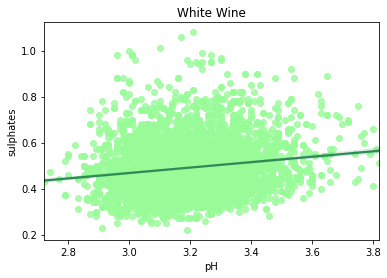

In [1527]:
g = sns.regplot(data=data_w, x="pH", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

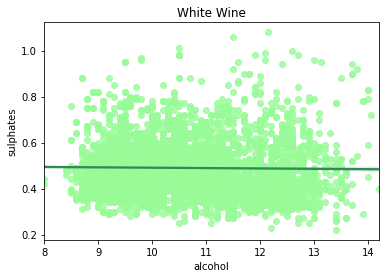

In [1528]:
g = sns.regplot(data=data_w, x="alcohol", y="sulphates", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

### [Alcohol]

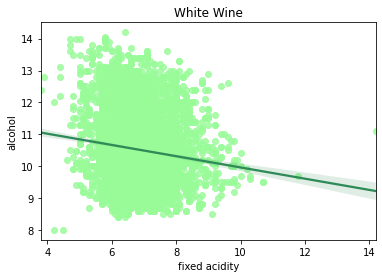

In [1529]:
g = sns.regplot(data=data_w, x="fixed acidity", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

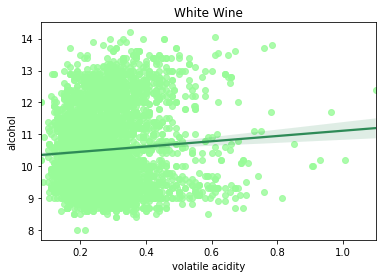

In [1530]:
g = sns.regplot(data=data_w, x="volatile acidity", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

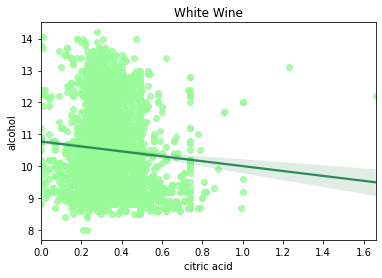

In [1531]:
g = sns.regplot(data=data_w, x="citric acid", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

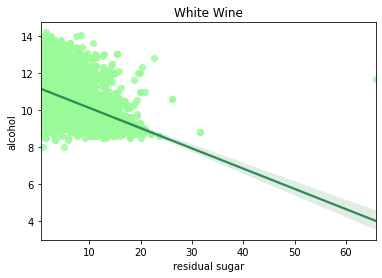

In [1532]:
g = sns.regplot(data=data_w, x="residual sugar", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

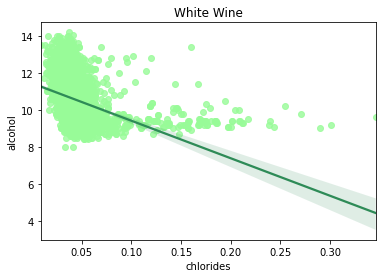

In [1533]:
g = sns.regplot(data=data_w, x="chlorides", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

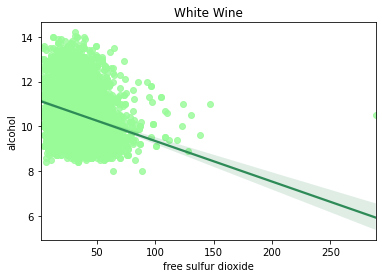

In [1534]:
g = sns.regplot(data=data_w, x="free sulfur dioxide", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

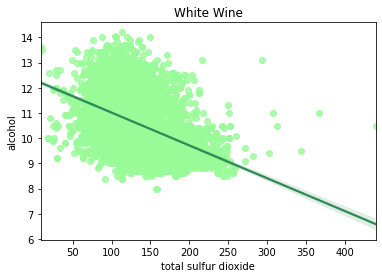

In [1535]:
g = sns.regplot(data=data_w, x="total sulfur dioxide", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

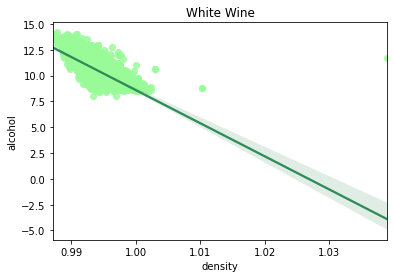

In [1536]:
g = sns.regplot(data=data_w, x="density", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

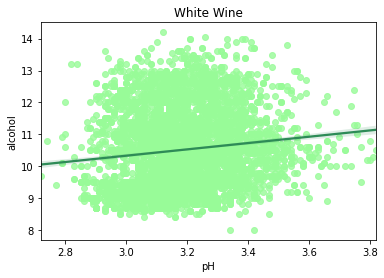

In [1537]:
g = sns.regplot(data=data_w, x="pH", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

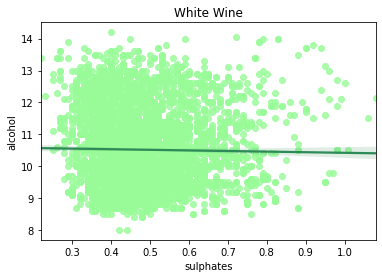

In [1538]:
g = sns.regplot(data=data_w, x="sulphates", y="alcohol", scatter_kws={"color":"palegreen"}, line_kws={"color":"seagreen"}).set(title = "White Wine")

## Categorical Scatterplots for Quality

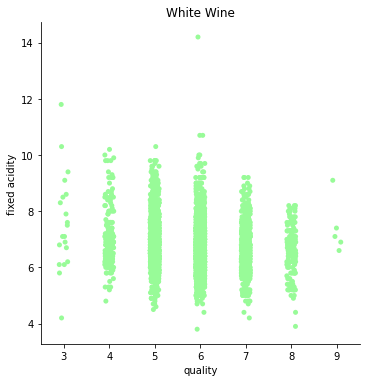

In [1539]:
g = sns.catplot(data=data_w, x="quality", y="fixed acidity", color="palegreen").set(title = "White Wine")

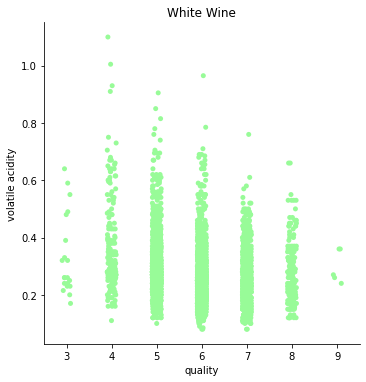

In [1540]:
g = sns.catplot(data=data_w, x="quality", y="volatile acidity", color="palegreen").set(title = "White Wine")

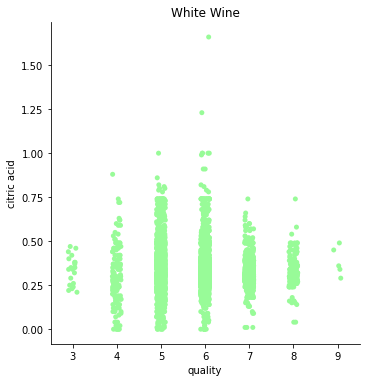

In [1541]:
g = sns.catplot(data=data_w, x="quality", y="citric acid", color="palegreen").set(title = "White Wine")

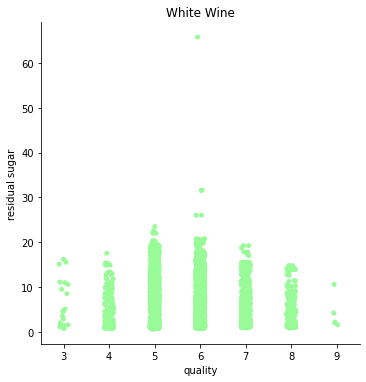

In [1542]:
g = sns.catplot(data=data_w, x="quality", y="residual sugar", color="palegreen").set(title = "White Wine")

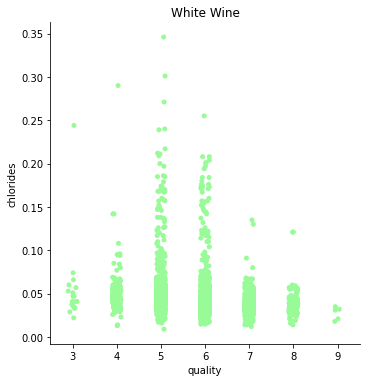

In [1543]:
g = sns.catplot(data=data_w, x="quality", y="chlorides", color="palegreen").set(title = "White Wine")

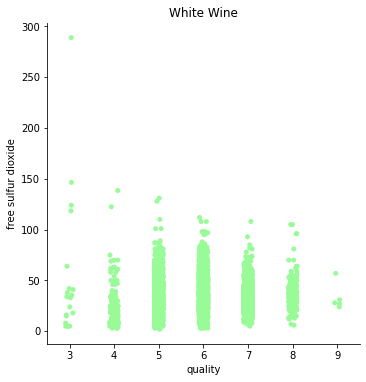

In [1544]:
g = sns.catplot(data=data_w, x="quality", y="free sulfur dioxide", color="palegreen").set(title = "White Wine")

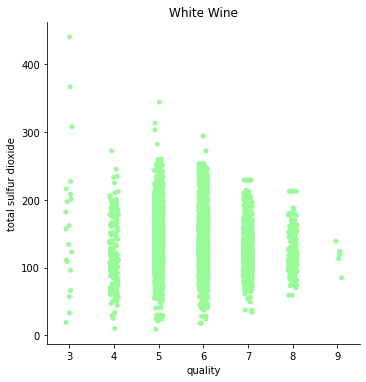

In [1545]:
g = sns.catplot(data=data_w, x="quality", y="total sulfur dioxide", color="palegreen").set(title = "White Wine")

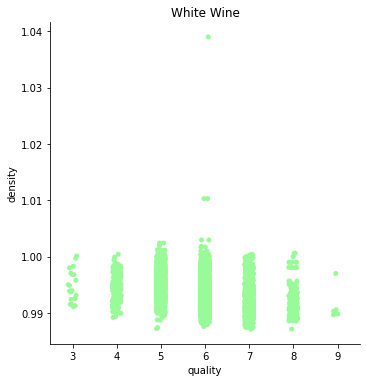

In [1546]:
g = sns.catplot(data=data_w, x="quality", y="density", color="palegreen").set(title = "White Wine")

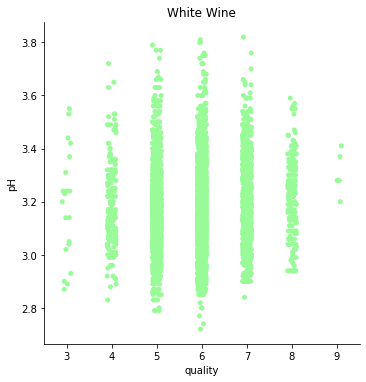

In [1547]:
g = sns.catplot(data=data_w, x="quality", y="pH", color="palegreen").set(title = "White Wine")

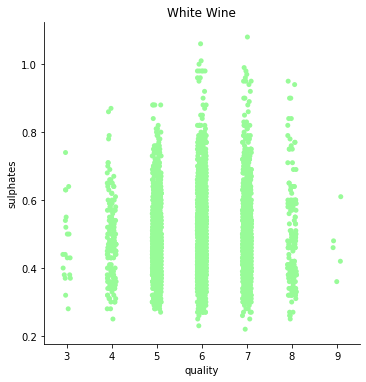

In [1548]:
g = sns.catplot(data=data_w, x="quality", y="sulphates", color="palegreen").set(title = "White Wine")

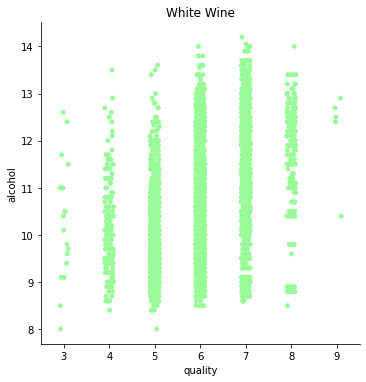

In [1549]:
g = sns.catplot(data=data_w, x="quality", y="alcohol", color="palegreen").set(title = "White Wine")

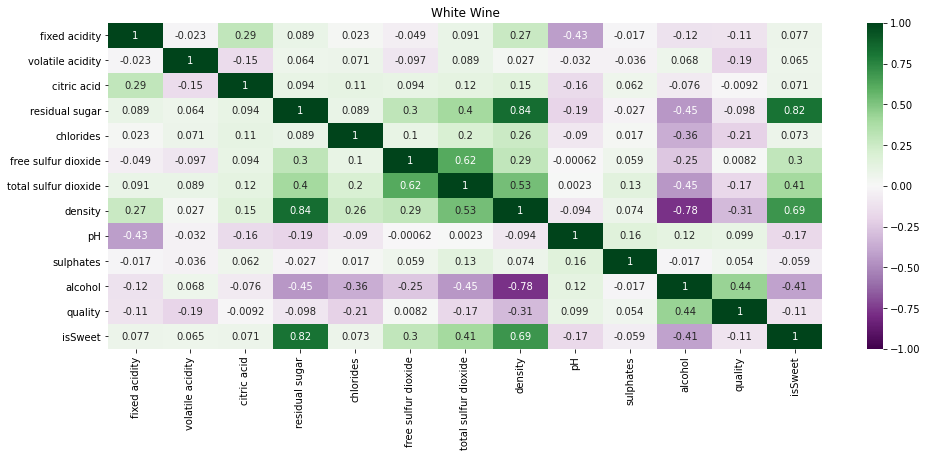

In [1550]:
plt.figure(figsize=(16, 6))
g = sns.heatmap(data_w.corr(), vmin=-1, vmax=1, annot=True, cmap='PRGn').set(title = "White Wine")

In [1551]:
data_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_cat,isSweet
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,L,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,M,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,M,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,M,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,M,1


In [1552]:
dummies = []
dummies.append(pd.get_dummies(data_w["alcohol_cat"]))
df_dummies = pd.concat(dummies, axis=1)
data_w = pd.concat((data_w, df_dummies), axis=1)
data_w = data_w.drop(["alcohol_cat"], axis=1)

In [1553]:
data_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isSweet,H,L,M
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,0,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0,0,1


In [1554]:
data_bin_w = data_w.rename(columns={"quality":"quality_cat"})
for index, series in data_bin_w.iterrows():
    quality = series["quality_cat"]
    if quality < 6:
        data_bin_w.loc[index, "quality_cat"] = 0
    else:
        data_bin_w.loc[index, "quality_cat"] = 1

In [1555]:
data_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isSweet,H,L,M
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,0,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0,0,1


In [1556]:
data_bin_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat,isSweet,H,L,M
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1,0,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,0,0,0,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1,0,0,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1,0,0,1


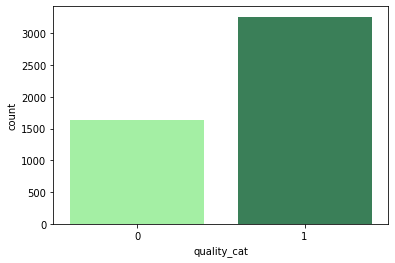

In [1557]:
g = sns.countplot(x="quality_cat", data=data_bin_w, palette={0:"palegreen",1:"seagreen"})

In [1558]:
X = data_bin_w.drop(["quality_cat"], axis=1).values
Q = data_bin_w["quality_cat"].values

In [1559]:
XTrain, XTest, QTrain, QTest = train_test_split(X, Q, test_size=0.2, random_state=10)

XTrain, QTrain = SMOTE().fit_resample(XTrain, QTrain)
print(Counter(QTrain))

Counter({1: 2589, 0: 2589})


In [1560]:
scaler = StandardScaler()
XTrain, XTest = (scaler.fit_transform(d) for d in (XTrain, XTest))

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      2589
           1       0.76      0.70      0.73      2589

    accuracy                           0.74      5178
   macro avg       0.74      0.74      0.74      5178
weighted avg       0.74      0.74      0.74      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.50      0.83      0.62       311
           1       0.89      0.62      0.73       669

    accuracy                           0.68       980
   macro avg       0.69      0.72      0.68       980
weighted avg       0.76      0.68      0.69       980

Cross-validation scores: 0.74 (± 0.02)


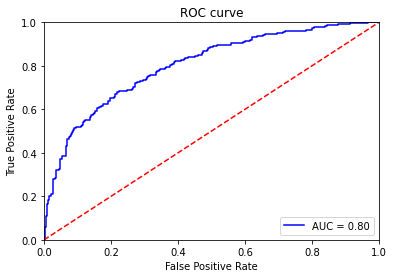

In [1561]:
clf = LogisticRegression(penalty='l2', C=1, solver='lbfgs',multi_class='auto')
clf.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

In [1562]:
tuned_parameters = [{'C': [1, 10, 100]}]

clf = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='auto'), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'C': 100}

Grid scores on development set:

0.739 (± 0.042) for {'C': 1}

0.739 (± 0.040) for {'C': 10}

0.739 (± 0.040) for {'C': 100}



Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      2589
           1       0.77      0.67      0.72      2589

    accuracy                           0.74      5178
   macro avg       0.74      0.74      0.73      5178
weighted avg       0.74      0.74      0.73      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.49      0.83      0.62       311
           1       0.89      0.60      0.72       669

    accuracy                           0.67       980
   macro avg       0.69      0.72      0.67       980
weighted avg       0.76      0.67      0.69       980

Cross-validation scores: 0.73 (± 0.01)


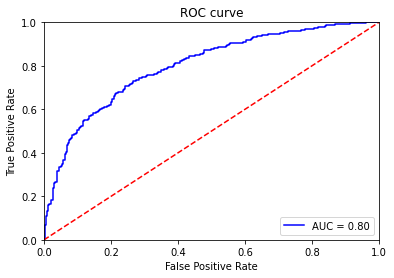

In [1563]:
svm = SVC(kernel='linear')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2589
           1       0.83      0.76      0.79      2589

    accuracy                           0.80      5178
   macro avg       0.80      0.80      0.80      5178
weighted avg       0.80      0.80      0.80      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.53      0.78      0.63       311
           1       0.87      0.67      0.76       669

    accuracy                           0.71       980
   macro avg       0.70      0.73      0.69       980
weighted avg       0.76      0.71      0.72       980

Cross-validation scores: 0.77 (± 0.05)


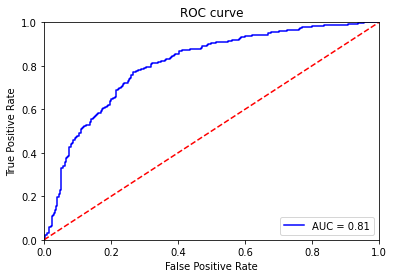

In [1564]:
svm = SVC(kernel='poly')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      2589
           1       0.84      0.80      0.82      2589

    accuracy                           0.82      5178
   macro avg       0.82      0.82      0.82      5178
weighted avg       0.82      0.82      0.82      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.58      0.79      0.67       311
           1       0.88      0.73      0.80       669

    accuracy                           0.75       980
   macro avg       0.73      0.76      0.73       980
weighted avg       0.79      0.75      0.76       980

Cross-validation scores: 0.79 (± 0.03)


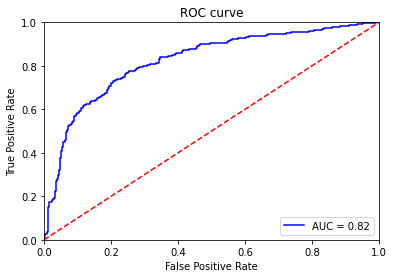

In [1565]:
svm = SVC(kernel='rbf')
clf = svm.fit(XTrain, QTrain)

# predictions on training set
Q_pred_Train = clf.predict(XTrain)

# predictions on test set
Q_pred_Test = clf.predict(XTest)
    
print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest, probs=False)

In [1566]:
tuned_parameters = [{'kernel': ['rbf'], 'C': [1, 10, 100]},
                    {'kernel': ['poly'], 'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'C': 100, 'kernel': 'rbf'}

Grid scores on development set:

0.796 (± 0.059) for {'C': 1, 'kernel': 'rbf'}

0.821 (± 0.059) for {'C': 10, 'kernel': 'rbf'}

0.826 (± 0.094) for {'C': 100, 'kernel': 'rbf'}

0.776 (± 0.066) for {'C': 1, 'kernel': 'poly'}

0.796 (± 0.067) for {'C': 10, 'kernel': 'poly'}

0.797 (± 0.077) for {'C': 100, 'kernel': 'poly'}

0.734 (± 0.035) for {'C': 1, 'kernel': 'linear'}

0.734 (± 0.035) for {'C': 10, 'kernel': 'linear'}

0.733 (± 0.035) for {'C': 100, 'kernel': 'linear'}



Train Set Predictions Report

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2589
           1       0.93      0.89      0.91      2589

    accuracy                           0.91      5178
   macro avg       0.91      0.91      0.91      5178
weighted avg       0.91      0.91      0.91      5178

Test Set Predictions Report

              precision    recall  f1-score   support

           0       0.40      0.78      0.53       311
           1       0.82      0.44      0.58       669

    accuracy                           0.55       980
   macro avg       0.61      0.61      0.55       980
weighted avg       0.68      0.55      0.56       980

Cross-validation scores: 0.78 (± 0.05)


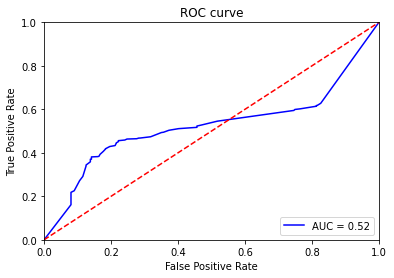

In [1567]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2589
           1       1.00      1.00      1.00      2589

    accuracy                           1.00      5178
   macro avg       1.00      1.00      1.00      5178
weighted avg       1.00      1.00      1.00      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.38      0.98      0.55       311
           1       0.96      0.26      0.41       669

    accuracy                           0.49       980
   macro avg       0.67      0.62      0.48       980
weighted avg       0.78      0.49      0.46       980

Cross-validation scores: 0.85 (± 0.07)


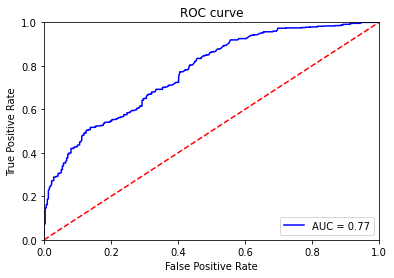

In [1568]:
clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=10)
clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

In [1569]:
tuned_parameters = [{'n_estimators': [10,50,100,200],
                     'max_depth': [5,10,20,50]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'max_depth': 50, 'n_estimators': 200}

Grid scores on development set:

0.775 (± 0.062) for {'max_depth': 5, 'n_estimators': 10}

0.781 (± 0.056) for {'max_depth': 5, 'n_estimators': 50}

0.785 (± 0.068) for {'max_depth': 5, 'n_estimators': 100}

0.787 (± 0.061) for {'max_depth': 5, 'n_estimators': 200}

0.815 (± 0.060) for {'max_depth': 10, 'n_estimators': 10}

0.828 (± 0.069) for {'max_depth': 10, 'n_estimators': 50}

0.836 (± 0.073) for {'max_depth': 10, 'n_estimators': 100}

0.834 (± 0.069) for {'max_depth': 10, 'n_estimators': 200}

0.838 (± 0.067) for {'max_depth': 20, 'n_estimators': 10}

0.858 (± 0.079) for {'max_depth': 20, 'n_estimators': 50}

0.859 (± 0.074) for {'max_depth': 20, 'n_estimators': 100}

0.859 (± 0.084) for {'max_depth': 20, 'n_estimators': 200}

0.844 (± 0.059) for {'max_depth': 50, 'n_estimators': 10}

0.858 (± 0.072) for {'max_depth': 50, 'n_estimators': 50}

0.858 (± 0.084) for {'max_depth': 50, 'n_estimators'

Train Set Predictions Report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2589
           1       0.90      0.84      0.87      2589

    accuracy                           0.88      5178
   macro avg       0.88      0.88      0.88      5178
weighted avg       0.88      0.88      0.88      5178

Test Set Predictions Report:

              precision    recall  f1-score   support

           0       0.56      0.75      0.64       311
           1       0.86      0.72      0.79       669

    accuracy                           0.73       980
   macro avg       0.71      0.74      0.71       980
weighted avg       0.77      0.73      0.74       980

Cross-validation scores: 0.78 (± 0.04)


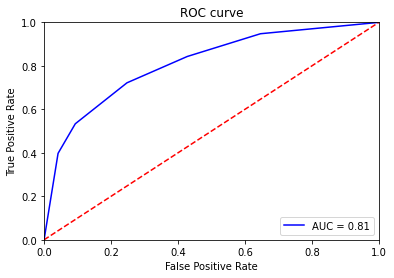

In [1570]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(XTrain, QTrain)

# predictions
Q_pred_Train = clf.predict(XTrain)
Q_pred_Test = clf.predict(XTest)

print('Train Set Predictions Report:\n')
print(classification_report(QTrain, Q_pred_Train))
print('Test Set Predictions Report:\n')
print(classification_report(QTest, Q_pred_Test))

scores = cross_val_score(clf, XTrain, QTrain, cv=3)
print(f"Cross-validation scores: {scores.mean():.2f} (± {scores.std() * 2:.2f})")

plotROC(clf, XTest, QTest)

In [1571]:
tuned_parameters = [{'n_neighbors': [5, 10, 25, 50]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5)
clf.fit(XTrain, QTrain)

print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("\nGrid scores on development set:\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

Best parameters set found on development set:

{'n_neighbors': 5}

Grid scores on development set:

0.794 (± 0.039) for {'n_neighbors': 5}

0.784 (± 0.047) for {'n_neighbors': 10}

0.771 (± 0.039) for {'n_neighbors': 25}

0.762 (± 0.028) for {'n_neighbors': 50}

